In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [2]:
A=pd.read_csv('car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
A.shape

(93, 27)

In [5]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


In [7]:
A.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

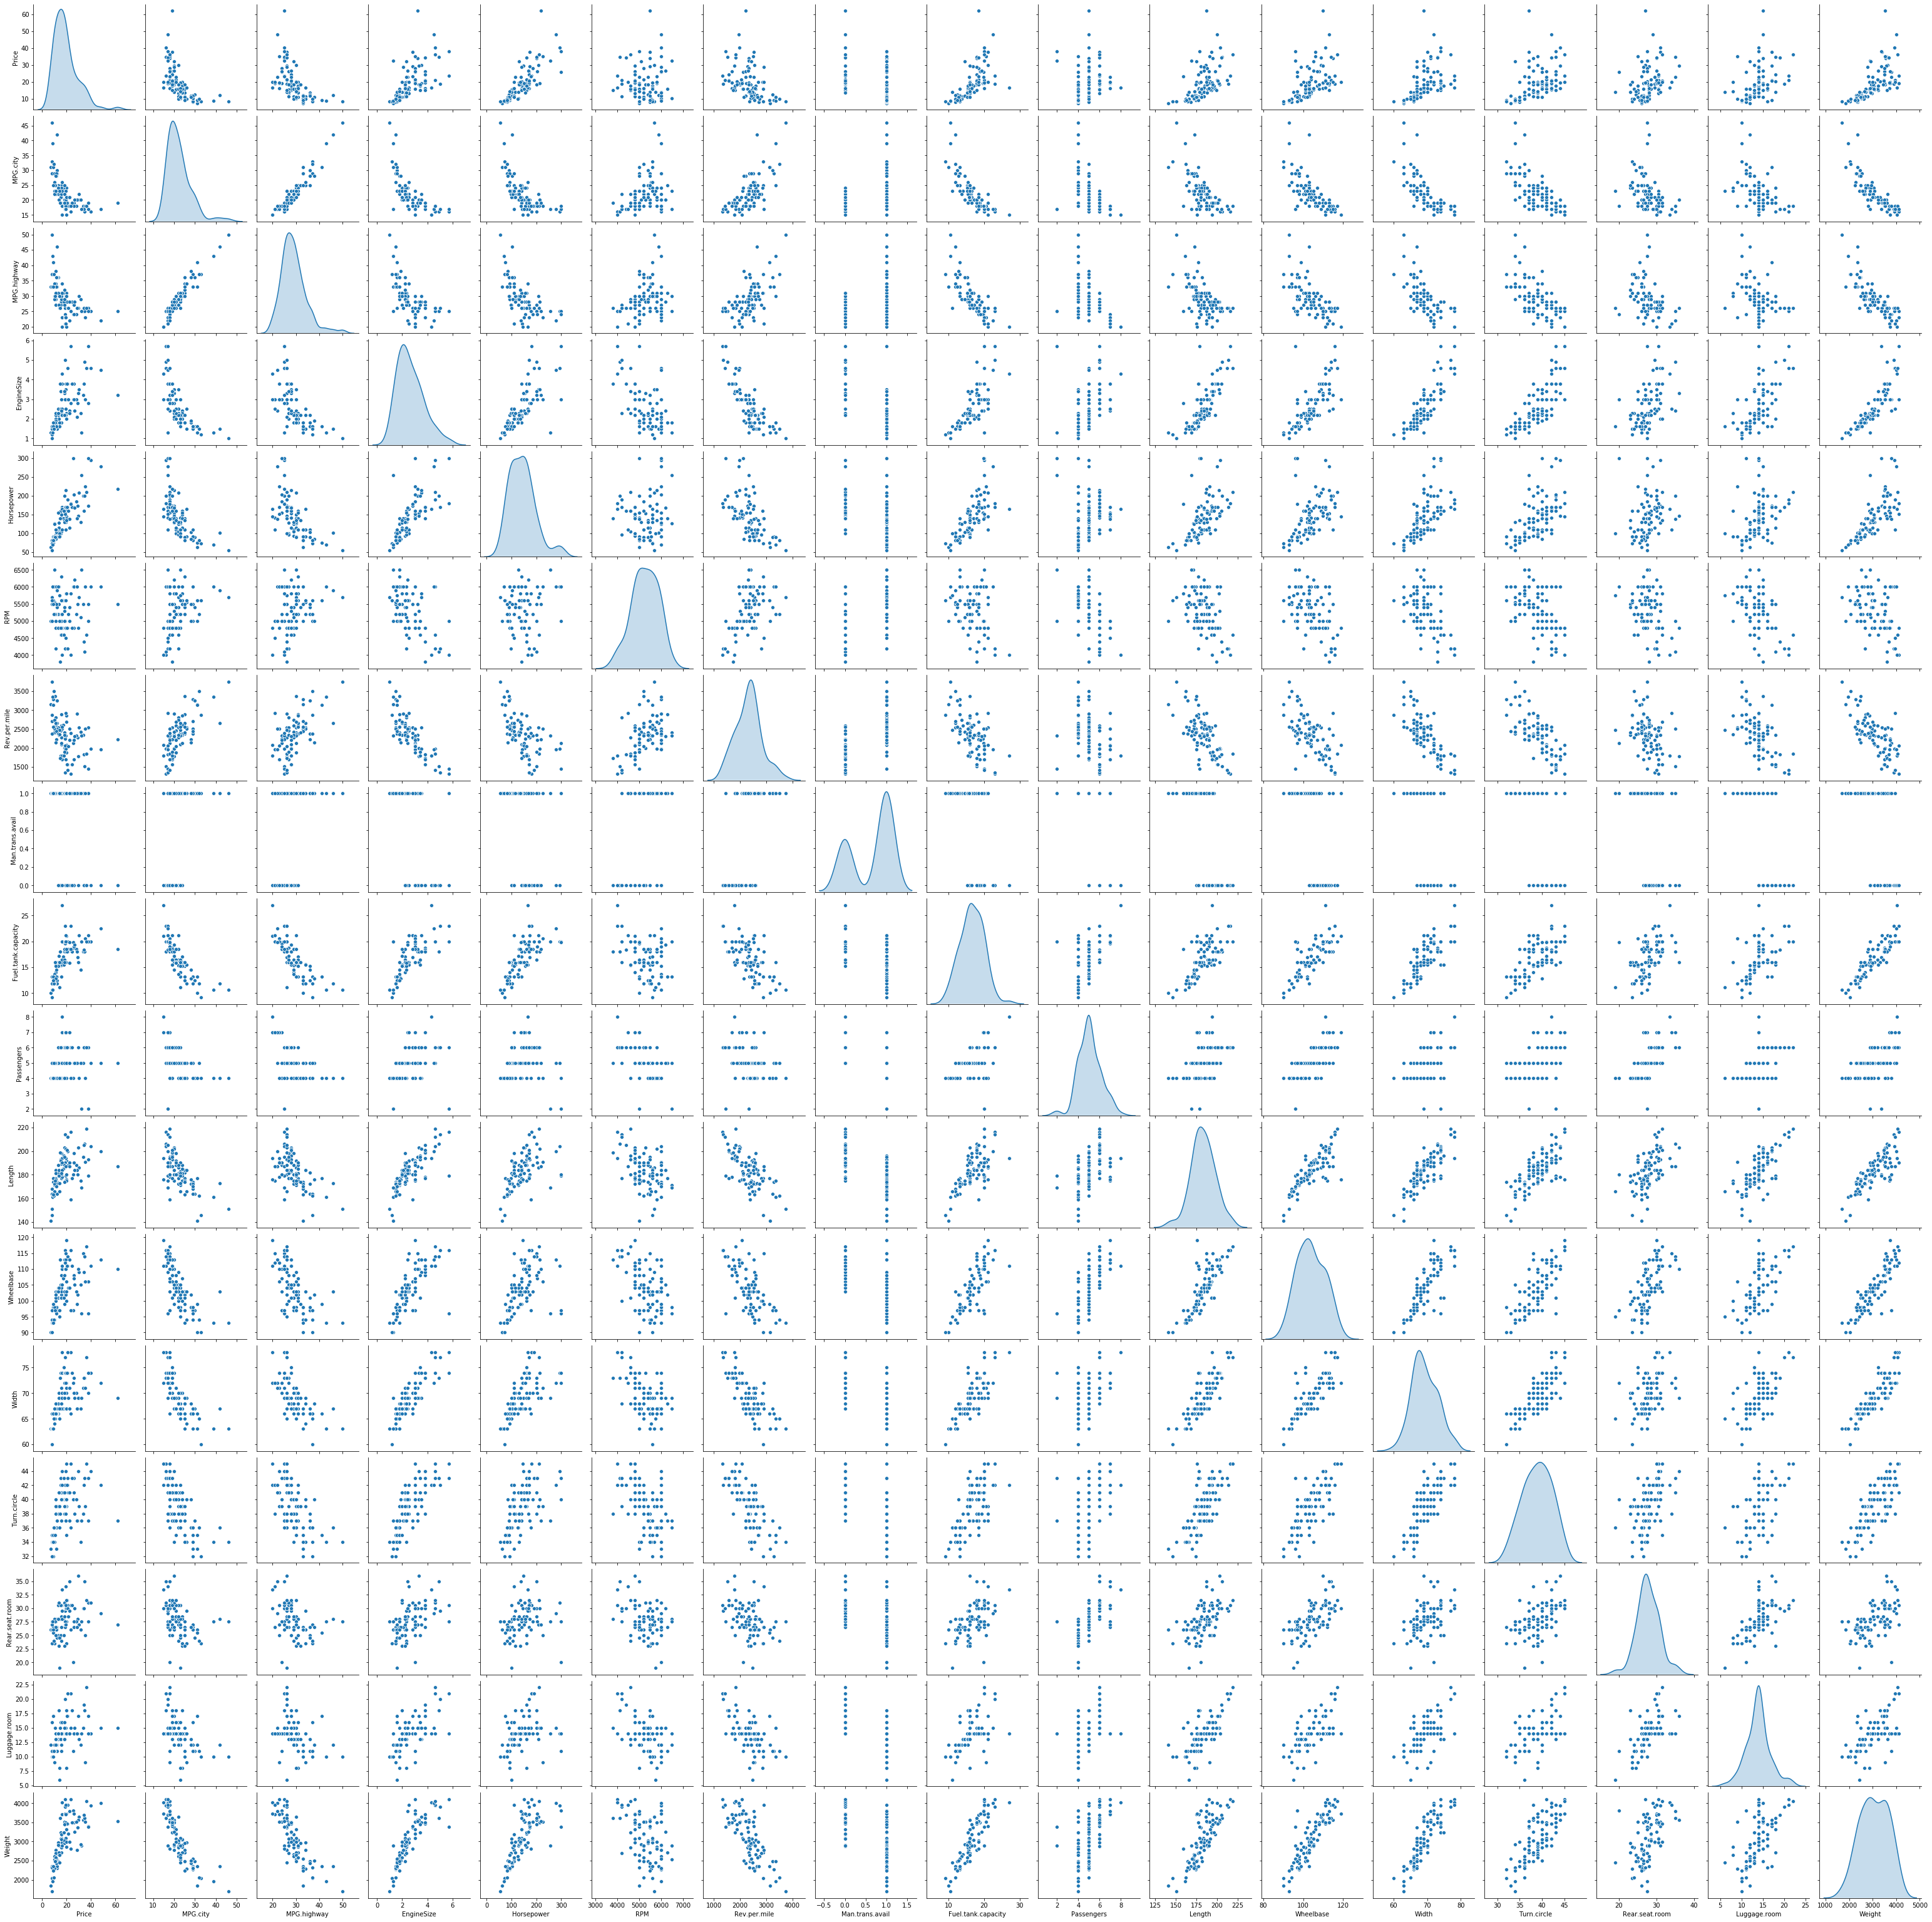

In [67]:
sns.pairplot(B,diag_kind='kde')

In [7]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [15]:
A['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [0]:
B=A.drop(['Manufacturer','Make','Min.Price','Max.Price','Model','Origin'],axis=1)
X=B.drop('Price',axis=1)
Y=B['Price']

In [0]:
BT=B.groupby(by='Type')
BT_1=BT.get_group('Midsize')
BT_2=BT.get_group('Small')
BT_3=BT.get_group('Compact')
BT_4=BT.get_group('Sporty')
BT_5=BT.get_group('Large')
BT_6=BT.get_group('Van')


In [0]:
from scipy.stats import f_oneway,ttest_ind

In [21]:
f_oneway(BT_1['Price'],BT_2['Price'],BT_3['Price'],BT_4['Price'],BT_5['Price'],BT_6['Price'])

F_onewayResult(statistic=11.531617846935891, pvalue=1.4769990356644984e-08)

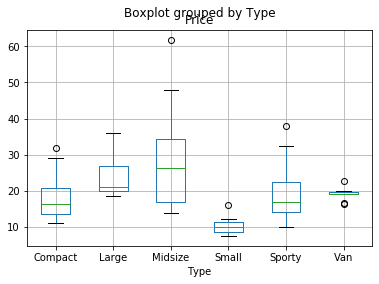

In [22]:
A.boxplot(column='Price',by='Type')

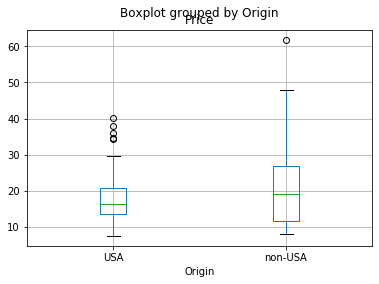

In [23]:
A.boxplot(column='Price',by='Origin')

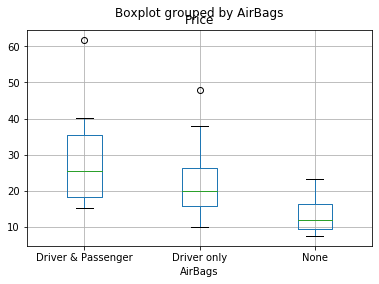

In [28]:
A.boxplot(column='Price',by='AirBags')

In [0]:
BO=B.groupby(by='Origin')
BO_1=BO.get_group('USA')
BO_2=BO.get_group('non-USA')

In [29]:
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [0]:
BA=B.groupby(by='AirBags')
BA_1=BA.get_group('None')
BA_2=BA.get_group('Driver & Passenger')
BA_3=BA.get_group('Driver only')

In [34]:
f_oneway(BA_1['Price'],BA_2['Price'],BA_3['Price'])

F_onewayResult(statistic=21.177572370824066, pvalue=2.9011868198272043e-08)

In [26]:
ttest_ind(BO_1['Price'],BO_2['Price'])

Ttest_indResult(statistic=-0.9655463914123011, pvalue=0.33683021808366587)

In [0]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

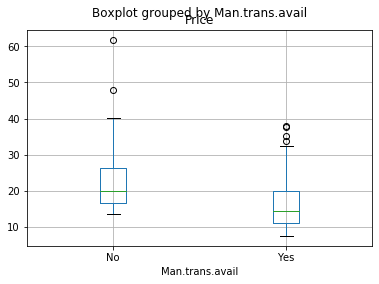

In [35]:
A.boxplot(column='Price',by='Man.trans.avail')

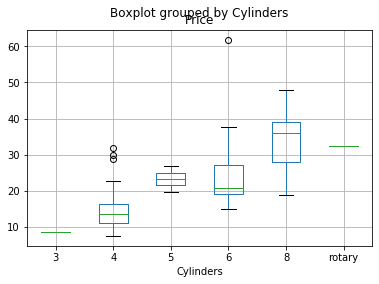

In [36]:
A.boxplot(column='Price',by='Cylinders')

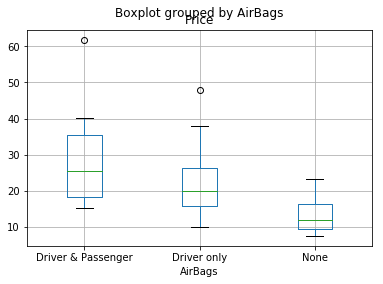

In [0]:
A.boxplot(column='Price',by='AirBags')

In [0]:
A1=A[A['AirBags']=='Driver & Passenger']
A1['Price'].describe()

count    16.000000
mean     28.368750
std      12.545422
min      15.100000
25%      18.225000
50%      25.550000
75%      35.425000
max      61.900000
Name: Price, dtype: float64

In [40]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 21 columns):
Type                  93 non-null object
Price                 93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64
Rear.seat.room        91 non-null float64
Luggage.room          82 non-null float64
Weight                93 non-null int64
dtypes: float64(5), int64(11), object(5)
m

In [0]:
B['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

converting it into numerical

# Handling Null Values 

As the null values are less than 10 % we can use median to impute

In [0]:
B['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)
B['Luggage.room'].fillna(X['Luggage.room'].median(),inplace=True)

In [0]:
#Method-1
B_airbags=pd.get_dummies(B['AirBags'])
B_cyl=pd.get_dummies(B['Cylinders'])
B_update=pd.concat([B,B_airbags],axis=1)
#Dummies for Drive Train
B_DT=pd.get_dummies(B['DriveTrain'])
B_update=pd.concat([B_update,B_DT],axis=1)
#Dummies for Cylinders
B_cyl=pd.get_dummies(B['Cylinders'])
B_update=pd.concat([B_update,B_cyl],axis=1)
#Dummies for Type
B_type=pd.get_dummies(B['Type'])
B_update=pd.concat([B_update,B_type],axis=1)



In [51]:
B.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640


In [52]:
#Method-2
B_new=pd.get_dummies(B,prefix=['Type','AirBags','DriveTrain','Cylinders'])

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
1,15.9,25,31,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,33.9,18,25,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,29.1,20,26,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,37.7,19,26,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
5,30.0,22,30,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [61]:
B_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 35 columns):
Price                         93 non-null float64
MPG.city                      93 non-null int64
MPG.highway                   93 non-null int64
EngineSize                    93 non-null float64
Horsepower                    93 non-null int64
RPM                           93 non-null int64
Rev.per.mile                  93 non-null int64
Man.trans.avail               93 non-null int64
Fuel.tank.capacity            93 non-null float64
Passengers                    93 non-null int64
Length                        93 non-null int64
Wheelbase                     93 non-null int64
Width                         93 non-null int64
Turn.circle                   93 non-null int64
Rear.seat.room                93 non-null float64
Luggage.room                  93 non-null float64
Weight                        93 non-null int64
Type_Compact                  93 non-null uint8
Type_Large             

In [0]:
X=B_new.drop(['Price'],axis=1)
Y=B_new['Price']

In [0]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [149]:
Xc=sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model=sm.OLS(Y,Xc).fit()

In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     14.88
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.38e-18
Time:                        08:46:43   Log-Likelihood:                -257.16
No. Observations:                  93   AIC:                             564.3
Df Residuals:                      68   BIC:                             627.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         47.6444     13.494      3.531      0.001      20.718      74.570
Horsepower                     0.1025      0.025      4.046      0.000       0.052       0.153
Man.trans.avail               -1.3919      1.735     -0.802      0.425      -4.853       2.069
Fuel.tank.capacity             0.4490      0.411      1.093      0.278      -0.371       1.269
Length                         0.0486      0.099      0.493      0.624      -0.148       0.245
Wheelbase                      0.2289      0.232      0.985      0.328      -0.235       0.692
Width                         -1.7177      0.424     -4.049      0.000      -2.564      -0.871
Turn.circle                   -0.7258      0.310     -2.343      0.022      -1.344      -0.108
Rear.seat.room                 0.5014      0.291      1.724      0.089      -0.079       1.082
Luggage.room                   0.2866      0.299      0.958      0.341      -0.310       0.883
Weight                      9.872e-05      0.004      0.024      0.981      -0.008       0.008
Type_Compact                   5.9019      2.181      2.706      0.009       1.550      10.254
Type_Large                     5.8744      3.948      1.488      0.141      -2.004      13.753
Type_Midsize                   9.7046      2.620      3.703      0.000       4.476      14.934
Type_Small                     4.9699      2.407      2.065      0.043       0.166       9.773
Type_Sporty                    9.4303      2.461      3.833      0.000       4.520      14.340
Type_Van                      11.7632      4.848      2.426      0.018       2.088      21.438
AirBags_Driver & Passenger    19.6574      4.948      3.973      0.000       9.784      29.531
AirBags_Driver only           16.2310      4.431      3.663      0.000       7.389      25.073
AirBags_None                  11.7560      4.373      2.688      0.009       3.030      20.482
DriveTrain_4WD                13.4417      4.411      3.048      0.003       4.641      22.243
DriveTrain_Front              14.6546      4.577      3.202      0.002       5.522      23.787
DriveTrain_Rear               19.5481      4.953      3.947      0.000       9.664      29.432
Cylinders_3                    5.9691      3.743      1.595      0.115      -1.500      13.438
Cylinders_4                    7.2701      2.967      2.451      0.017       1.350      13.190
Cylinders_5                    6.5218      4.167      1.565      0.122      -1.794      14.837
Cylinders_6                   10.7128      2.918      3.671      0.000       4.890      16.536
Cylinders_8                   14.1444      3.887      3.639      0.001       6.389      21.900
Cylinders_rotary               3.0263      5.403      0.560      0.577      -7.754      13.807
===========================================

In [0]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [167]:
X.columns

Index(['EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight',
       'Type_Compact', 'Type_Large', 'Type_Midsize', 'Type_Small',
       'Type_Sporty', 'Type_Van', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_4WD',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3', 'Cylinders_4',
       'Cylinders_5', 'Cylinders_6', 'Cylinders_8', 'Cylinders_rotary'],
      dtype='object')

In [0]:
X_qr=X[['MPG.city','MPG.highway','Horsepower','Rev.per.mile']]

In [88]:
X.columns

Index(['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Type_Compact', 'Type_Large', 'Type_Midsize',
       'Type_Small', 'Type_Sporty', 'Type_Van', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_4WD',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3', 'Cylinders_4',
       'Cylinders_5', 'Cylinders_6', 'Cylinders_8', 'Cylinders_rotary'],
      dtype='object')

In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X_qr)


In [0]:
X_MVLR=X[['Width','Turn.circle','Type_Compact','Type_Sporty','Type_Small','Type_Midsize','Cylinders_4','Cylinders_6','Cylinders_8','AirBags_Driver & Passenger','AirBags_Driver only','AirBags_None','DriveTrain_Front','DriveTrain_Rear','DriveTrain_4WD']]
X_MVLR_std=sc.fit_transform(X_MVLR)


In [0]:
X_MVLR_df=pd.DataFrame(X_MVLR)

In [176]:
X_MVLR.head()

,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,DriveTrain_4WD
1,68,37,0,0,1,0,1,0,0,0,0,1,1,0,0
2,71,38,0,0,0,1,0,1,0,1,0,0,1,0,0
3,67,37,1,0,0,0,0,1,0,0,1,0,1,0,0
4,70,37,0,0,0,1,0,1,0,1,0,0,1,0,0
5,69,39,0,0,0,1,1,0,0,0,1,0,0,1,0


# Quadratic Regression Model

In [179]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=2)
XQR=qr.fit_transform(X_std)
XQR_df=pd.DataFrame(XQR)
XQR_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838
1,1.0,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032
2,1.0,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175
3,1.0,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641
4,1.0,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682


In [180]:
XQR_final=XQR_df.drop([0],axis=1)
XQR_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682


In [181]:
idx=np.arange(X_MVLR.shape[0])
X_MVLR.index=idx
XQR_final_2=pd.concat([XQR_final,X_MVLR],axis=1)
XQR_final_2.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,DriveTrain_4WD
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838,68,37,0,0,1,0,1,0,0,0,0,1,1,0,0
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032,71,38,0,0,0,1,0,1,0,1,0,0,1,0,0
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175,67,37,1,0,0,0,0,1,0,0,1,0,1,0,0
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641,70,37,0,0,0,1,0,1,0,1,0,0,1,0,0
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682,69,39,0,0,0,1,1,0,0,0,1,0,0,1,0


In [189]:
test=np.array([1,1,0,1,0,1,1,0,1])
(test-np.mean(test))/np.std(test,ddof=1)

array([ 0.66666667,  0.66666667, -1.33333333,  0.66666667, -1.33333333,
        0.66666667,  0.66666667, -1.33333333,  0.66666667])

In [182]:
XQR_final_2.shape

(93, 29)

In [0]:
QR=LinearRegression()

In [0]:
models = []
models.append(('QR', QR))

QR: 5.707418 (0.606872)


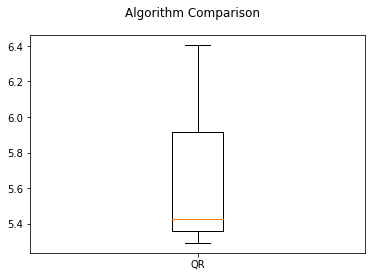

In [185]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, XQR_final_2, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Other Models

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor


In [0]:
LR=LinearRegression()

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(3,20),'weights':['uniform','distance']}

In [0]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [0]:
X_scaled=sc.fit_transform(X)

In [196]:
GS.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [197]:
GS.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [0]:
dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}

In [0]:
GS_dt=GridSearchCV(dt,dt_params,cv=3,scoring='neg_mean_squared_error')

In [200]:
GS_dt.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 

In [201]:
GS_dt.best_params_ 

{'max_depth': 4, 'min_samples_leaf': 7}

In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
KNN=KNeighborsRegressor(n_neighbors=5,weights='distance')
DT=DecisionTreeRegressor(max_depth=4,min_samples_leaf=7,random_state=0)
RF=RandomForestRegressor(n_estimators=100,random_state=0)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=50,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=800)
#stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])


In [0]:
models = []
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoostRegressor',GBoost))
#models.append(('VotingRegressor',stacked))

KNNRegressor: 6.083763 (1.807283)
DT_Regressor: 6.279626 (1.923909)
RF_Regressor: 5.819464 (1.762264)
AdaBoostRF: 5.792523 (1.492292)
GradientBoostRegressor: 6.312592 (1.416657)


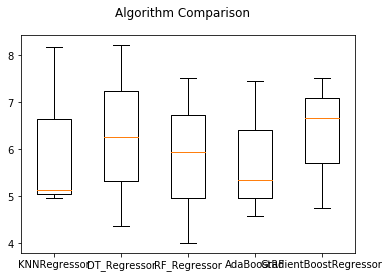

In [207]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_scaled, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
results

[array([3.45686825, 6.76581015, 7.51945109])]

MVLR: 5.417600 (0.945460)


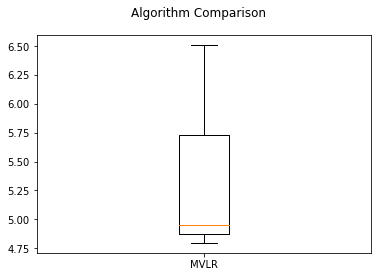

In [0]:
# Validating the 3rd order Polynomial Regression Model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_final_NL, Y,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
   

In [0]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [0]:
X_new=A[['MPG.city','MPG.highway','DriveTrain','Cylinders','Man.trans.avail','EngineSize',
     'Horsepower','Rev.per.mile','Fuel.tank.capacity','Length','Width','Turn.circle',
     'Rear.seat.room','Luggage.room','Weight','AirBags']]
Y=A[['Price']]

In [0]:
X_new['Rear.seat.room'].fillna(X_new['Rear.seat.room'].median(),inplace=True)
X_new['Luggage.room'].fillna(X_new['Luggage.room'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
X_new['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
X_new['Man.trans.avail'].value_counts()

1    61
0    32
Name: Man.trans.avail, dtype: int64

In [0]:
X_airbags=pd.get_dummies(X_new['AirBags'])
X_update=pd.concat([X_new,X_airbags],axis=1)
#Dummies for Drive Train
X_DT=pd.get_dummies(X_new['DriveTrain'])
X_update=pd.concat([X_update,X_DT],axis=1)
#Dummies for Cylinders
X_cyl=pd.get_dummies(X_new['Cylinders'])
X_update=pd.concat([X_update,X_cyl],axis=1)


# PCA

In [0]:
X_pca=X_update.drop(['AirBags','DriveTrain','Cylinders'],axis=1)
X_pca.shape

(93, 25)

In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X_pca)

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
eig_vals

array([ 1.05639825e+01,  2.21623553e+00,  1.97742222e+00,  1.64815576e+00,
        1.46788965e+00,  1.34235055e+00,  1.13872609e+00,  1.03506372e+00,
        7.65259652e-01,  7.14761055e-01,  4.38176083e-01,  3.84028601e-01,
        3.49706736e-01,  3.19301571e-01,  2.46137236e-01,  1.76709440e-01,
        1.65648374e-01,  1.31646708e-01,  7.35021107e-02,  5.75413972e-02,
        2.52531681e-02,  3.42409581e-02, -1.00582954e-15,  1.81664614e-16,
        7.20749257e-17])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 41.80156524  50.57118541  58.39582389  64.9175585   70.72598205
  76.03764873  80.54357563  84.63931164  87.66743586  90.49573766
  92.22959572  93.74919276  95.13297856  96.39645144  97.37041383
  98.06965119  98.72512002  99.24604463  99.53689169  99.76458238
  99.90007349 100.         100.         100.         100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:18]).transpose()

In [0]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(93, 18)

In [0]:
type(Proj_data)

numpy.ndarray

In [0]:
from sklearn import metrics

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model, name in zip([LR],['LinearRegression']):
    rmse=[]
    for train,test in kf.split(Proj_data,Y):
        Xtrain,Xtest=Proj_data[train,:],Proj_data[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse),
                                    np.std(rmse,ddof=1), name ))   

RMSE scores: 5.59 (+/- 0.66965) [LinearRegression]


In [0]:
(0.8232-0.6695)/0.8232

0.18671039844509238

In [0]:
(5.59-5.218)/5.59

0.06654740608228979

In [0]:
LR.fit(Proj_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Proj_data[:3,:]

array([[-2.81652748,  0.4970531 , -0.17612774,  0.11797536, -0.53746396,
        -0.49336638, -0.93157584, -0.60474956, -0.50371156,  0.33618957,
         0.06093331,  0.37863056, -0.15931071, -0.47448517,  0.10257462,
         0.0247102 , -0.3513485 , -0.4009162 ],
       [ 2.05058911,  1.48754754, -0.88897247, -0.40395142, -1.72220391,
         1.30726231,  0.21374133,  0.51143238,  0.33785688,  0.79294483,
         1.45114265, -0.4496693 ,  0.03237301,  0.05507902, -0.10005991,
         0.22011326, -0.57351748,  0.11151065],
       [ 0.53065519, -0.01696641, -0.07756391,  0.98335371, -0.15446132,
         1.24417273,  1.16116244,  0.02597672, -1.13148599, -0.28995139,
         1.41305473, -0.50229087,  0.38236043,  0.40106005,  0.0897804 ,
         0.01048487, -0.31593692, -0.14793751]])

In [0]:
LR.predict(Proj_data[:3,:])

array([[13.85406475],
       [32.64112448],
       [29.11178737]])

In [0]:
Y.iloc[:3]

,Price
1,15.9
2,33.9
3,29.1


In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
LR_bag=BaggingRegressor(n_estimators=10,random_state=0)
LR_boost=AdaBoostRegressor(n_estimators=100,random_state=0)
Gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [0]:
models = []
models.append(('MVLR', LR))
models.append(('BaggedLR', LR_bag))
models.append(('BoostedLR', LR_boost))




MVLR: 5.779270 (1.202844)
BaggedLR: 6.048282 (2.092195)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

BoostedLR: 5.899110 (2.035301)


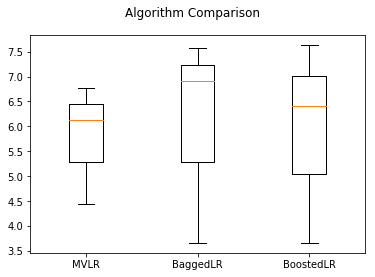

In [0]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Quadratic Regression Model outperforms remaining models So we can say that this dataset is performing well on quadratic regression